<a href="https://colab.research.google.com/github/vinit-narula/AI-ML/blob/main/3_MNIST_Udacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classifying Images of Clothing**

###1. Install and import dataset and dependencies
###2. Load the Fashion MNIST dataset
###3. Preprocess the data
###4. Build the model
###5. Compile the model
###6. Train the model
###7. Evaluate accuracy
###8. Make predictions and explore


#1. Install and import dataset and dependencies 

In [ ]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.7MB 12.7MB/s 
  Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [2]:
import tensorflow as tfn

#Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

#Helpler Libraries
import math
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

#2. Load the Fashion MNIST dataset

In [4]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [5]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Explore the data

In [6]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


#3. Preprocess the data

In [7]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

Explore the processed data


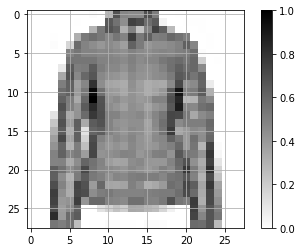

In [8]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28, 28))


# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar() #show side colorbar
plt.grid(True)
plt.show()


Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.


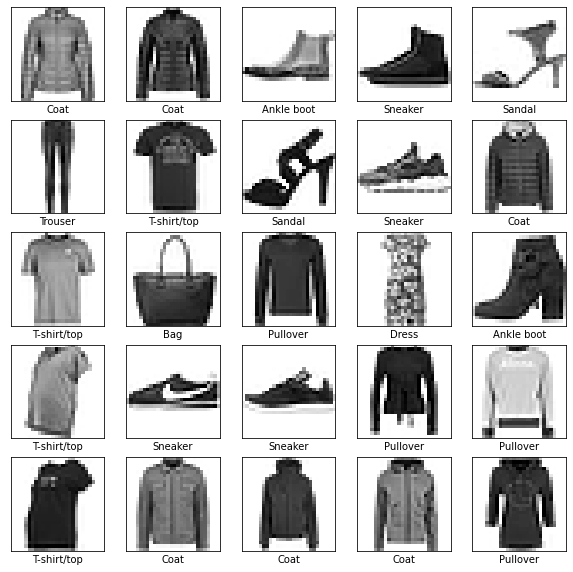

In [9]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(test_dataset.take(25)):
  image = image.numpy().reshape((28, 28))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
plt.show()

#4. Build the model

###Setup the layers

The basic building block of a neural network is the layer. A layer extracts a representation from the data fed into it. Hopefully, a series of connected layers results in a representation that is meaningful for the problem at hand.

Much of deep learning consists of chaining together simple layers. Most layers, like tf.keras.layers.Dense, have internal parameters which are adjusted ("learned") during training.

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

This network has three layers:

* **input**  `tf.keras.layers.Flatten` — This layer transforms the images from a 2d-array of 28  ×  28 pixels, to a 1d-array of 784 pixels (28*28). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn, as it only reformats the data.

* **"hidden"** `tf.keras.layers.Dense`— A densely connected layer of 128 neurons. Each neuron (or node) takes input from all 784 nodes in the previous layer, weighting that input according to hidden parameters which will be learned during training, and outputs a single value to the next layer.

* **output** `tf.keras.layers.Dense` — A 128-neuron, followed by 10-node softmax layer. Each node represents a class of clothing. As in the previous layer, the final layer takes input from the 128 nodes in the layer before it, and outputs a value in the range [0, 1], representing the probability that the image belongs to that class. The sum of all 10 node values is 1.

#5. Compile the model


In [11]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

#6. Train the model

####First, we define the iteration behavior for the train dataset:

1. Repeat forever by specifying dataset.repeat() (the epochs parameter described below limits how long we perform training).
2. The dataset.shuffle(60000) randomizes the order so our model cannot learn anything from the order of the examples.
3. And dataset.batch(32) tells model.fit to use batches of 32 images and labels when updating the model variables.

####Training is performed by calling the model.fit method:

1. Feed the training data to the model using train_dataset.
2. The model learns to associate images and labels.
3. The epochs=5 parameter limits training to 5 full iterations of the training dataset, so a total of 5 * 60000 = 300000 examples.

In [13]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [14]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))


Epoch 1/5
1875/1875 [==============================] - 9s 2ms/step - loss: 0.6195 - accuracy: 0.7879
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3812 - accuracy: 0.8630
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3433 - accuracy: 0.8742
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3179 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2988 - accuracy: 0.8908


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

#7. Evaluate accuracy
Next, compare how the model performs on the test dataset. Use all examples we have in the test dataset to assess accuracy.

In [15]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_train_examples/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

1875/1875 [==============================] - 1s 649us/step - loss: 0.3552 - accuracy: 0.8727
Accuracy on test dataset: 0.8726999759674072


As it turns out, the accuracy on the test dataset is smaller than the accuracy on the training dataset. This is completely normal, since the model was trained on the train_dataset. When the model sees images it has never seen during training, (that is, from the test_dataset), we can expect performance to go down.

#8. Make predictions and explore

With the model trained, we can use it to make predictions about some images.

In [18]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [19]:
predictions.shape

(32, 10)

In [20]:
predictions[0]

array([3.2271309e-05, 7.6665667e-05, 1.6773747e-02, 3.4019092e-06,
       9.6851110e-01, 4.9487997e-10, 1.4595644e-02, 1.1083802e-08,
       7.1940308e-06, 2.0327855e-10], dtype=float32)

In [21]:
np.argmax(predictions[0])

4

In [22]:
test_labels[0]

4

In [23]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

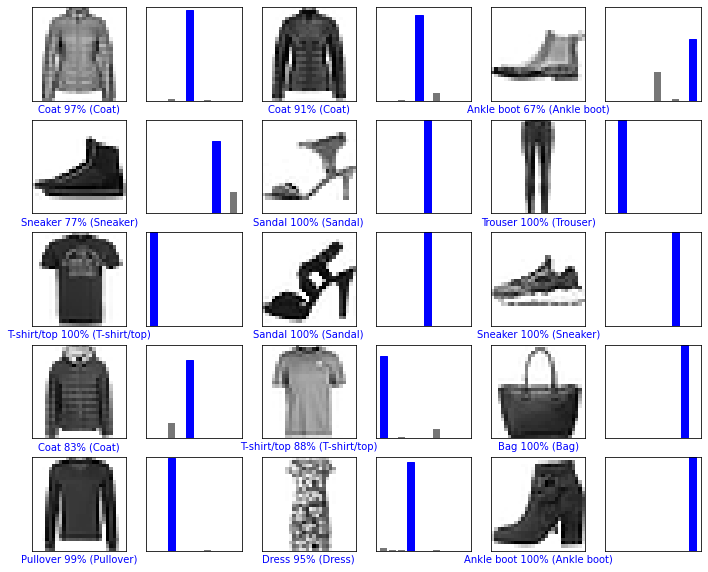

In [24]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [25]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [26]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [27]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.2271277e-05 7.6665667e-05 1.6773755e-02 3.4019063e-06 9.6851110e-01
  4.9487903e-10 1.4595630e-02 1.1083802e-08 7.1940235e-06 2.0327855e-10]]


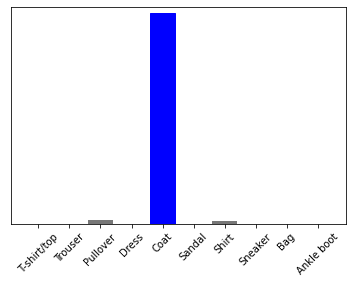

In [28]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [29]:
np.argmax(predictions_single[0])

4